### **QUESTION 1**

In [2]:
import numpy as np

def hebbian_learning(inputs, outputs, lr=0.01):
    weights = np.zeros(inputs.shape[1])
    for x, y in zip(inputs, outputs):
        weights += lr * x * y
    return weights


In [3]:
def correlation_learning(inputs, outputs, lr=0.01):
    weights = np.zeros(inputs.shape[1])
    for x, y in zip(inputs, outputs):
        weights += lr * x * (y - 0.5)  # Assuming 0.5 as a threshold
    return weights


In [4]:
import numpy as np

def outstar_learning(inputs, lr=0.01, epochs=10):
    num_inputs = inputs.shape[1]
    weights = np.zeros(num_inputs)

    for _ in range(epochs):
        for x in inputs:
            for i in range(num_inputs):
                weights[i] += lr * (x[i] - weights[i])

    return weights

# Example usage:
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
weights_outstar = outstar_learning(inputs)

print("OutStar Learning Weights:", weights_outstar)


OutStar Learning Weights: [0.16717754 0.16634585]


In [5]:
def delta_learning(inputs, outputs, lr=0.1, epochs=10):
    weights = np.zeros(inputs.shape[1])
    for epoch in range(epochs):
        for x, y in zip(inputs, outputs):
            y_pred = np.dot(x, weights)
            error = y - y_pred
            weights += lr * error * x

    return weights


In [6]:
import numpy as np

def perceptron_learning(inputs, outputs, lr=0.1, epochs=10):
    weights = np.zeros(inputs.shape[1])
    for epoch in range(epochs):
        for x, y in zip(inputs, outputs):
            y_pred = 1 if np.dot(x, weights) >= 0 else 0
            error = y - y_pred
            weights += lr * error * x

    return weights


In [7]:
# Sample data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])  # XOR gate output

print("Hebbian Learning:", hebbian_learning(inputs, outputs))
print("Perceptron Learning:", perceptron_learning(inputs, outputs))
print("Delta Learning:", delta_learning(inputs, outputs))
print("Correlation Learning:", correlation_learning(inputs, outputs))


Hebbian Learning: [0.01 0.01]
Perceptron Learning: [-0.1 -0.1]
Delta Learning: [0.27501741 0.27501741]
Correlation Learning: [0. 0.]


### **QUESTION 2:**

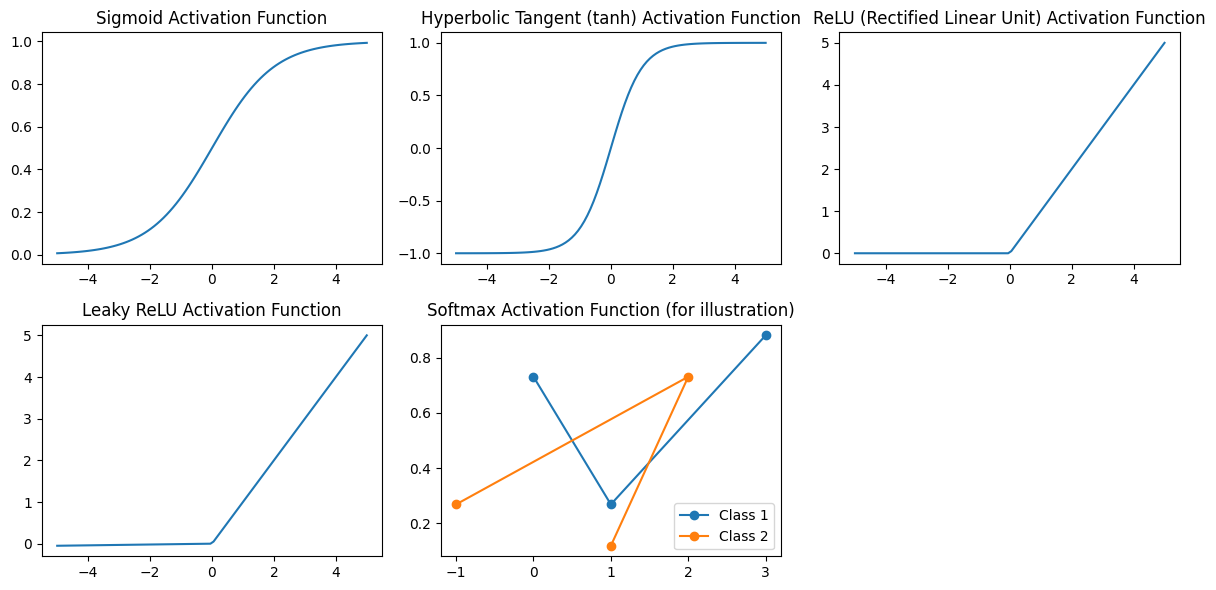

In [8]:
#2
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # subtract max(x) for numerical stability
    return exp_x / np.sum(exp_x, axis=0)

# Plotting the activation functions
x = np.linspace(-5, 5, 100)

# Sigmoid
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.title('Sigmoid Activation Function')
plt.plot(x, sigmoid(x))

# Tanh
plt.subplot(2, 3, 2)
plt.title('Hyperbolic Tangent (tanh) Activation Function')
plt.plot(x, tanh(x))

# ReLU
plt.subplot(2, 3, 3)
plt.title('ReLU (Rectified Linear Unit) Activation Function')
plt.plot(x, relu(x))

# Leaky ReLU
plt.subplot(2, 3, 4)
plt.title('Leaky ReLU Activation Function')
plt.plot(x, leaky_relu(x))

# Softmax (for visualization, using only two classes)
softmax_input = np.array([[3, 1, 0], [1, 2, -1]])
plt.subplot(2, 3, 5)
plt.title('Softmax Activation Function (for illustration)')
softmax_output = softmax(softmax_input)
plt.plot(softmax_input.T, softmax_output.T, marker='o')
plt.legend(['Class 1', 'Class 2'])

plt.tight_layout()
plt.show()


### **QUESTION 3:**

In [9]:
#3
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def predict(self, inputs):
        # Calculate the weighted sum
        weighted_sum = sum(w * inp for w, inp in zip(self.weights, inputs)) + self.bias
        # Apply the step function
        return 1 if weighted_sum > 0 else 0

    def calculate_accuracy(self, test_data):
        correct_predictions = 0
        for inputs, expected in test_data:
            prediction = self.predict(inputs)
            if prediction == expected:
                correct_predictions += 1
        return correct_predictions / len(test_data)

# Weights for Favorite hero, heroine, and Climate respectively
weights = [0.2, 0.4, 0.2]
bias = -0.5

# Create Perceptron
perceptron = Perceptron(weights, bias)

# Sample test data: (inputs, expected_output)
test_data = [
    ([1, 1, 1], 1),  # All true
    ([1, 0, 1], 0),  # One false
    ([0, 1, 1], 1),  # One false
    ([0, 0, 0], 0),  # All false
    ([1, 1, 0], 1),  # Two true
    ([0, 1, 0], 0)   # One true
]

# Calculate accuracy
accuracy = perceptron.calculate_accuracy(test_data)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [10]:
pip install numpy opencv-python tensorflow


### **QUESTION 4:**

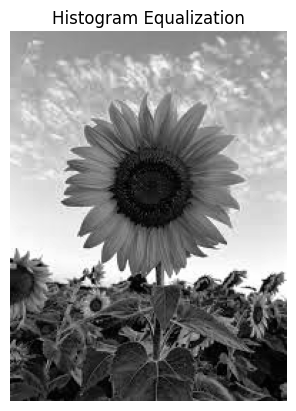

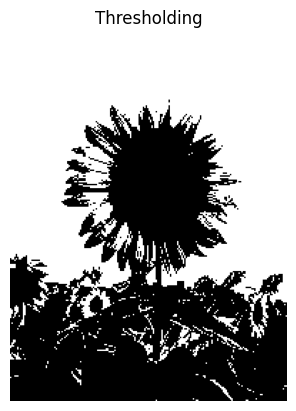

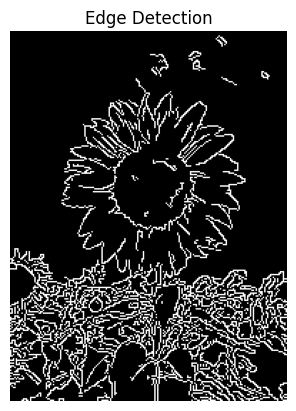

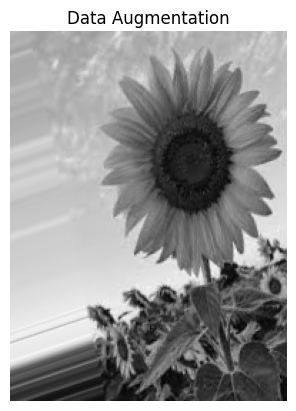

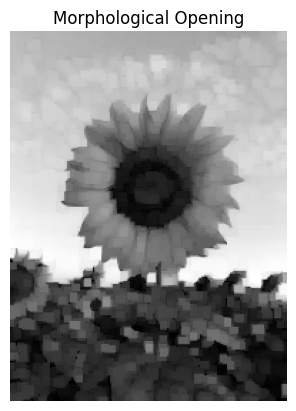

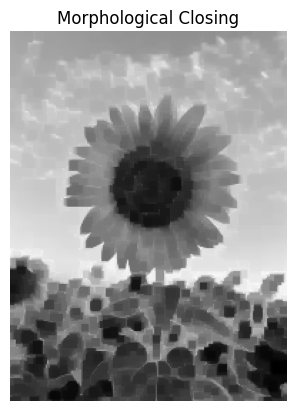

In [12]:
#4
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load an image
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Display an image
def display_image(title, image):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Histogram Equalization
def histogram_equalization(image):
    return cv2.equalizeHist(image)

# Thresholding
def thresholding(image, thresh_val=127):
    _, thresholded = cv2.threshold(image, thresh_val, 255, cv2.THRESH_BINARY)
    return thresholded

# Edge Detection using Canny
def edge_detection(image):
    return cv2.Canny(image, 100, 200)

# Data Augmentation
def data_augmentation(image):
    image = np.expand_dims(image, axis=-1)
    image = np.repeat(image, 3, axis=-1)  # Convert to 3 channels
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    augmented_images = next(datagen.flow(np.expand_dims(image, 0)))
    return augmented_images[0].astype(np.uint8)

# Morphological Operations
def morphological_operations(image):
    kernel = np.ones((5, 5), np.uint8)
    morph_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    morph_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    return morph_open, morph_close

# Main function to demonstrate operations
def main():
    image_path = '/content/images.jpg'  # Change to your image path
    image = load_image(image_path)

    # Histogram Equalization
    hist_eq_image = histogram_equalization(image)
    display_image('Histogram Equalization', hist_eq_image)

    # Thresholding
    thresholded_image = thresholding(image)
    display_image('Thresholding', thresholded_image)

    # Edge Detection
    edges = edge_detection(image)
    display_image('Edge Detection', edges)

    # Data Augmentation
    augmented_image = data_augmentation(image)
    display_image('Data Augmentation', cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))

    # Morphological Operations
    morph_open, morph_close = morphological_operations(image)
    display_image('Morphological Opening', morph_open)
    display_image('Morphological Closing', morph_close)

if __name__ == "__main__":
    main()


### **QUESTION 5:**

In [13]:
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.ops.numpy_ops import np_config; np_config.enable_numpy_behavior()

In [16]:
def load_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img/255.
    return img

content_image = load_img('/content/images (1).jpg')
style_1 = load_img('/content/images (1).jpg')

In [17]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [18]:
def apply_style(content_image, style):
  content_image = content_image.reshape(1, content_image.shape[0], content_image.shape[1], content_image.shape[2]).astype('float32')
  content_image = tf.convert_to_tensor(content_image)
  style = cv2.resize(style, (256,256))
  style = style.reshape(1, style.shape[0], style.shape[1], style.shape[2]).astype('float32')
  outputs = model(tf.constant(content_image), tf.constant(style))
  stylized_image = outputs[0]
  return stylized_image

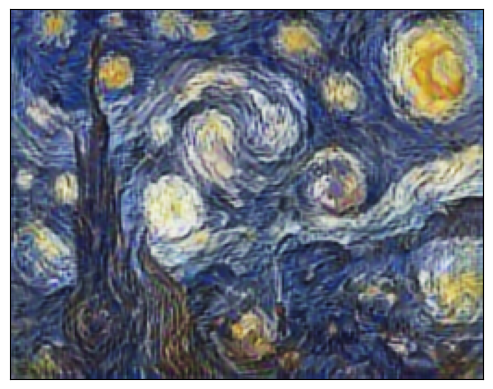

In [19]:
img = apply_style(content_image, style_1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(img[0])
plt.show()

### **QUESTION 6:**

In [20]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder

In [21]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [22]:
cifar_10_classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]


In [23]:
x_train.shape

(50000, 32, 32, 3)

(-0.5, 31.5, 31.5, -0.5)

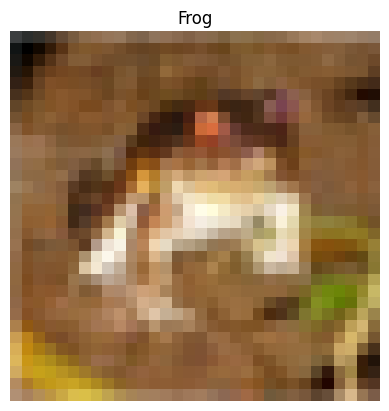

In [24]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.title(cifar_10_classes[y_train[0][0]])
plt.axis("off")

In [25]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [26]:
one_hot_encoder = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.transform(y_test).toarray()

In [27]:
softmax_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
softmax_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [29]:
softmax_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
782/782 [==============================] - 4s 4ms/step - loss: 1.9294 - accuracy: 0.3177 - val_loss: 1.8906 - val_accuracy: 0.3306
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1.8457 - accuracy: 0.3596 - val_loss: 1.8446 - val_accuracy: 0.3475
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 1.8128 - accuracy: 0.3698 - val_loss: 1.7968 - val_accuracy: 0.3699
Epoch 4/20
782/782 [==============================] - 3s 3ms/step - loss: 1.8017 - accuracy: 0.3790 - val_loss: 1.8549 - val_accuracy: 0.3475
Epoch 5/20
782/782 [==============================] - 3s 3ms/step - loss: 1.7807 - accuracy: 0.3833 - val_loss: 1.7746 - val_accuracy: 0.3907
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 1.7763 - accuracy: 0.3876 - val_loss: 1.8068 - val_accuracy: 0.3690
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 1.7792 - accuracy: 0.3855 - val_loss: 1.7907 - val_accuracy: 0.3746
Epoch 

(-0.5, 31.5, 31.5, -0.5)

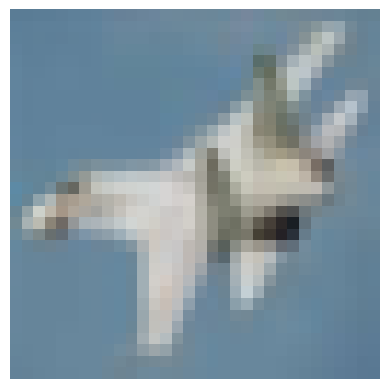

In [30]:
 new_image = x_test[10]
plt.imshow(new_image)
plt.axis("off")

In [31]:
img = np.expand_dims(new_image, axis=0)

In [32]:
img.shape

(1, 32, 32, 3)

In [33]:
pred = softmax_model.predict(img)

1/1 [==============================] - 0s 269ms/step


In [34]:
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [35]:
prediction = np.argmax(pred)
cifar_10_classes[prediction]

'Ship'

In [36]:
pip install tensorflow numpy


### **QUESTION 7:**

In [37]:
#7
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape images to include a channel dimension (1 for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


844/844 [==============================] - 64s 75ms/step - loss: 0.1898 - accuracy: 0.9427 - val_loss: 0.0538 - val_accuracy: 0.9837
313/313 - 2s - loss: 0.0493 - accuracy: 0.9845 - 2s/epoch - 7ms/step
Test accuracy: 98.45%


### **Question 8:**

In [38]:
#8
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load dataset
data = pd.read_csv('sonar.csv', header=None)

# Separate features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
def build_model(dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='softmax'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build model with dropout
model_with_dropout = build_model(dropout_rate=0.5)

# Train model
model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate on test data
y_pred = model_with_dropout.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy with dropout: {accuracy:.2f}')


Epoch 1/50
9/9 [==============================] - 3s 78ms/step - loss: 1.1117 - accuracy: 0.5379 - val_loss: 0.8230 - val_accuracy: 0.3824
Epoch 2/50
9/9 [==============================] - 0s 22ms/step - loss: 1.0373 - accuracy: 0.4848 - val_loss: 0.7443 - val_accuracy: 0.4706
Epoch 3/50
9/9 [==============================] - 0s 15ms/step - loss: 0.8237 - accuracy: 0.6288 - val_loss: 0.6949 - val_accuracy: 0.5588
Epoch 4/50
9/9 [==============================] - 0s 26ms/step - loss: 0.7332 - accuracy: 0.6515 - val_loss: 0.6574 - val_accuracy: 0.6471
Epoch 5/50
9/9 [==============================] - 0s 33ms/step - loss: 0.6467 - accuracy: 0.6364 - val_loss: 0.6239 - val_accuracy: 0.6471
Epoch 6/50
9/9 [==============================] - 0s 28ms/step - loss: 0.7393 - accuracy: 0.5682 - val_loss: 0.5980 - val_accuracy: 0.7059
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 0.5842 - accuracy: 0.7045 - val_loss: 0.5845 - val_accuracy: 0.7059
Epoch 8/50
9/9 [===========

### **Question 10:**

In [39]:
#10
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [41]:
model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        BatchNormalization(),  # Adding Batch Normalization layer
        Dropout(0.2),          # Adding Dropout layer with dropout rate of 0.2
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

In [42]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.3460 - accuracy: 0.8967 - val_loss: 0.1502 - val_accuracy: 0.9535
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1970 - accuracy: 0.9413 - val_loss: 0.1118 - val_accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1626 - accuracy: 0.9513 - val_loss: 0.0990 - val_accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1436 - accuracy: 0.9557 - val_loss: 0.0876 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1262 - accuracy: 0.9609 - val_loss: 0.0870 - val_accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1206 - accuracy: 0.9629 - val_loss: 0.0789 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1088 - accuracy: 0.9655 - val_loss: 0.0722 - val_accu

In [44]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)
print("Train accuracy:", train_acc)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0332 - accuracy: 0.9896
Train Loss: 0.033154577016830444
Train accuracy: 0.9895833134651184


In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0670 - accuracy: 0.9798
Test Loss: 0.06703441590070724
Test accuracy: 0.9797999858856201
